<a href="https://colab.research.google.com/github/nourelkhalawy/CartoonGan-tensorflow/blob/master/Copy_of_20190416_cartoonize_real_world_images_using_cartoongan_and_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CartoonGAN-TensorFlow2
Cartoonize your images using CartoonGAN, powered by TensorFlow 2.0. 

- [Blog post](https://leemeng.tw/generate-anime-using-cartoongan-and-tensorflow2-en.html)
- [Blog post (Traditional Chinese)](https://leemeng.tw/generate-anime-using-cartoongan-and-tensorflow2.html)
- [Github repo](https://github.com/mnicnc404/CartoonGan-tensorflow)

<img src="https://github.com/mnicnc404/CartoonGan-tensorflow/blob/master/images/cover.gif?raw=true" height="300px">

## Clone github  repo
This repo contain the Python script that we will use to generate cartoon-style images.

In [1]:
import os
repo = "CartoonGan-tensorflow"
!git clone https://github.com/nourelkhalawy/{repo}.git
os.chdir(os.path.join(repo))


fatal: destination path 'CartoonGan-tensorflow' already exists and is not an empty directory.


In [2]:
!ls | grep cartoonize.py

cartoonize.py


## Install packages
We will need TensorFlow 2.0 and [keras-contrib](https://github.com/keras-team/keras-contrib) packages.

In [3]:
from IPython.display import clear_output, display, Image

In [5]:
pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 21kB/s 
     |████████████████████████████████| 3.9MB 51.0MB/s 
     |████████████████████████████████| 450kB 46.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=b7d697b9ad3f9fa8f2ce9aee4cc93737d455c9ba2aa412ae969968e77afc73bd
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: 

In [4]:

import tensorflow as tf
print(tf.__version__)

2.1.0


## Download new images to cartoonize
Get url of the image that you wish to transform, and paste it in the form below. You can also keep the default url and see how it work. 

Supported format of the images:
- `.jpg`
- `.png`
- `.gif`

Url of sample images
- Harry Potter: https://media.giphy.com/media/o5HKScC1PflLO/giphy.gif
- Iron man: https://media.giphy.com/media/rlsHtd2YC8k0g/giphy.gif

In [25]:
image_url = 'https://media.giphy.com/media/iJa6kOfJ3qN7a/giphy.gif'  #@param {type: "string"}

Download the image from the web and save it for transformation. You don't need to know all the detail here now.

In [26]:
input_image_dir = "input_images"
output_image_dir = input_image_dir.replace("input_", "output_")

import time
if image_url:
    img_filename = image_url.split("/")[-1]
    name, ext = '.'.join(img_filename.split(".")[:-1]), img_filename.split(".")[-1]
    new_name = '_'.join((name, str(int(time.time()))))
    new_img_filename = '.'.join((new_name, ext))
    image_path = os.path.join(input_image_dir, new_img_filename)
    
    !wget {image_url} \
        && mv {img_filename} {new_img_filename} \
        && mv {new_img_filename} {image_path}

--2020-06-24 23:02:19--  https://media.giphy.com/media/iJa6kOfJ3qN7a/giphy.gif
Resolving media.giphy.com (media.giphy.com)... 151.101.78.2
Connecting to media.giphy.com (media.giphy.com)|151.101.78.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1026869 (1003K) [image/gif]
Saving to: ‘giphy.gif’

giphy.gif           100%[===================>]   1003K  --.-KB/s    in 0.1s    

2020-06-24 23:02:19 (7.80 MB/s) - ‘giphy.gif’ saved [1026869/1026869]



## The image that we're going to cartoonize

If you pasted the correct image url in the previous cell, this part will just show you the downloaded image.

In [27]:
# a trick to show gif in notebook
if ".gif" in new_img_filename:
    png_path = new_img_filename + '.png'
    !cp {image_path} {png_path}

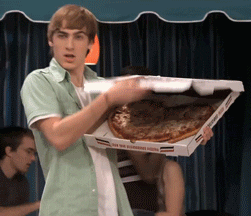

In [28]:
display(Image(png_path))

## Cartoonize images using Python script
Transform the downloaded image using selected style.

In [29]:
styles = "shinkai" #@param ["shinkai", "hayao", "hosoda", "paprika"]

In [30]:
!python cartoonize.py \
    --styles {styles} \
    --batch_size 1 \
    --comparison_view horizontal

2020-06-24 23:02:37.012375: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-06-24 23:02:37.012480: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-06-24 23:02:37.012496: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
[2020-06-24 23:02:37] [Cartoonizer] [INFO] Transformed images will be saved to `output_images` folder.
[2020-06-24 23:02:40] [Cartoonizer] [INFO] Cartoonizing images using shinkai style...
[2020-06-24 23:02:40

## Compare input with the caroonized result

In [31]:
if img_filename:
    if ".gif" in img_filename:
        generated_gif = os.path.join(output_image_dir, "comparison", new_img_filename)
        result_path = generated_gif + '.png'
        !cp {generated_gif} {result_path}
    else:
        result_path = os.path.join(output_image_dir, "comparison", new_img_filename)

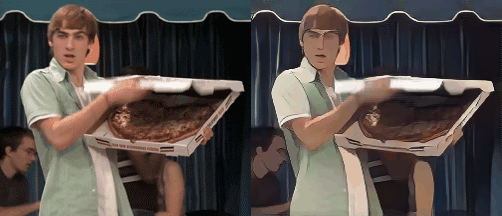

In [32]:
display(Image(result_path))

## Download the result


To download only the tranformed image , set `include_original_image` to `no`.

In [14]:
include_original_image = "no"  #@param {type: "string"}

In [15]:
from google.colab import files
if include_original_image == "yes":
    output_image_path = os.path.join(output_image_dir, "comparison", new_img_filename)
else:
    output_image_path = os.path.join(output_image_dir, styles, new_img_filename)
files.download(output_image_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Check all transformed_images

In [ ]:
!apt-get install tree
clear_output()

In [ ]:
!tree {output_image_dir}

## What you can do now
- try cartoonizing more new images
- view our [blog post](https://leemeng.tw/generate-anime-using-cartoongan-and-tensorflow2-en.html) to know more details
- share what you created with me and I can't wait to check them all!
    - [Twitter](https://twitter.com/leemengtw)
    - [Facebook](https://www.facebook.com/LeeMengTaiwan) 